# Loan Prediction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import tree

In [2]:
# load train dataset
df = pd.read_csv("Data for Cleaning & Modeling.csv")

C:\Users\hnb04\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# load test dataset
df_test = pd.read_csv ("Holdout for Testing.csv")

## Data Processing 

In [4]:
# rename training dataset columns 
df.columns = ["interest_rate", "unique_id_loan", "unquie_id_borrower", "loan_amount_requested", "loan_amount_funded", "inverstor_funded_loan", "number_payments", "loan_grade", "loan_subgrade", "employer/job_title", "years_employed", "home_owenrship_status", "annual_income_borrower", "income_verification", "date_loan_issued", "reason", "loan_category", "loan_title", "zip_code", "state_borrower", "debt_to_income", "30+_pastdue_times", "date_earliest_reported_credit_line", "num_inqueries_creditor", "months_last_delinquency", "month_last_public_record", "num_open_credit_lines", "num_derogatory_records", "credit_revolving_balance", "revolving_line_utilization_rate", "total_credit_lines", "initial_loan_status" ]

In [5]:
# rename testing dataset columns 
df_test.columns = ["interest_rate", "unique_id_loan", "unquie_id_borrower", "loan_amount_requested", "loan_amount_funded", "inverstor_funded_loan", "number_payments", "loan_grade", "loan_subgrade", "employer/job_title", "years_employed", "home_owenrship_status", "annual_income_borrower", "income_verification", "date_loan_issued", "reason", "loan_category", "loan_title", "zip_code", "state_borrower", "debt_to_income", "30+_pastdue_times", "date_earliest_reported_credit_line", "num_inqueries_creditor", "months_last_delinquency", "month_last_public_record", "num_open_credit_lines", "num_derogatory_records", "credit_revolving_balance", "revolving_line_utilization_rate", "total_credit_lines", "initial_loan_status" ]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   interest_rate                       338990 non-null  object 
 1   unique_id_loan                      399999 non-null  float64
 2   unquie_id_borrower                  399999 non-null  float64
 3   loan_amount_requested               399999 non-null  object 
 4   loan_amount_funded                  399999 non-null  object 
 5   inverstor_funded_loan               399999 non-null  object 
 6   number_payments                     399999 non-null  object 
 7   loan_grade                          338730 non-null  object 
 8   loan_subgrade                       338730 non-null  object 
 9   employer/job_title                  376014 non-null  object 
 10  years_employed                      382462 non-null  object 
 11  home_owenrship_status     

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   interest_rate                       0 non-null      float64
 1   unique_id_loan                      80000 non-null  int64  
 2   unquie_id_borrower                  80000 non-null  int64  
 3   loan_amount_requested               80000 non-null  object 
 4   loan_amount_funded                  80000 non-null  object 
 5   inverstor_funded_loan               80000 non-null  object 
 6   number_payments                     80000 non-null  object 
 7   loan_grade                          80000 non-null  object 
 8   loan_subgrade                       80000 non-null  object 
 9   employer/job_title                  75606 non-null  object 
 10  years_employed                      75618 non-null  object 
 11  home_owenrship_status               80000

### Convert data types

#### 1. Convert columns interest_rate and revolving_line_utilization_rate ffrom object to number

In [8]:
#train
df['interest_rate'] = df['interest_rate'].str.replace("%", "")
df['revolving_line_utilization_rate'] = df['revolving_line_utilization_rate'].str.replace("%", "")
df['interest_rate'] = df['interest_rate'].apply(lambda x:float(x)/100)
df['revolving_line_utilization_rate'] = df['revolving_line_utilization_rate'].apply(lambda x:float(x)/100)

In [9]:
#test
df_test['revolving_line_utilization_rate'] = df_test['revolving_line_utilization_rate'].str.replace("%", "")
df_test['revolving_line_utilization_rate'] = df_test['revolving_line_utilization_rate'].apply(lambda x:float(x)/100)

#### 2. Convert number_payments to number

In [10]:
# train
df['number_payments'] = df['number_payments'].str.replace(' months','')
df['number_payments'].value_counts()

 36    292369
 60    107630
Name: number_payments, dtype: int64

In [11]:
# test
df_test['number_payments'] = df_test['number_payments'].str.replace(' months','')
df_test['number_payments'].value_counts()

 36    53630
 60    26370
Name: number_payments, dtype: int64

#### 3. Convert loan_amount_requested, loan_amount_funded, investor_funded_loan to numbers

In [12]:
#train
df['loan_amount_requested'] = df['loan_amount_requested'].str.replace("$", "")
df['loan_amount_requested'] = df['loan_amount_requested'].str.replace(",", "")
df['loan_amount_funded'] = df['loan_amount_funded'].str.replace("$", "")
df['loan_amount_funded'] = df['loan_amount_funded'].str.replace(",", "")
df['inverstor_funded_loan'] = df['inverstor_funded_loan'].str.replace("$", "")
df['inverstor_funded_loan'] = df['inverstor_funded_loan'].str.replace(",", "")

df['loan_amount_requested'] = df['loan_amount_requested'].apply(lambda x:float(x))
df['loan_amount_funded'] = df['loan_amount_requested'].apply(lambda x:float(x))
df['inverstor_funded_loan'] = df['loan_amount_requested'].apply(lambda x:float(x))

<ipython-input-12-2a7f307ef667>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['loan_amount_requested'] = df['loan_amount_requested'].str.replace("$", "")
<ipython-input-12-2a7f307ef667>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['loan_amount_funded'] = df['loan_amount_funded'].str.replace("$", "")
<ipython-input-12-2a7f307ef667>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['inverstor_funded_loan'] = df['inverstor_funded_loan'].str.replace("$", "")


In [13]:
#test
df_test['loan_amount_requested'] = df_test['loan_amount_requested'].str.replace("$", "")
df_test['loan_amount_requested'] = df_test['loan_amount_requested'].str.replace(",", "")
df_test['loan_amount_funded'] = df_test['loan_amount_funded'].str.replace("$", "")
df_test['loan_amount_funded'] = df_test['loan_amount_funded'].str.replace(",", "")
df_test['inverstor_funded_loan'] = df_test['inverstor_funded_loan'].str.replace("$", "")
df_test['inverstor_funded_loan'] = df_test['inverstor_funded_loan'].str.replace(",", "")

df_test['loan_amount_requested'] = df_test['loan_amount_requested'].apply(lambda x:float(x))
df_test['loan_amount_funded'] = df_test['loan_amount_requested'].apply(lambda x:float(x))
df_test['inverstor_funded_loan'] = df_test['loan_amount_requested'].apply(lambda x:float(x))

<ipython-input-13-923d7f87ac64>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['loan_amount_requested'] = df_test['loan_amount_requested'].str.replace("$", "")
<ipython-input-13-923d7f87ac64>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['loan_amount_funded'] = df_test['loan_amount_funded'].str.replace("$", "")
<ipython-input-13-923d7f87ac64>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['inverstor_funded_loan'] = df_test['inverstor_funded_loan'].str.replace("$", "")


### Missing values

##### 1. check missing values in train and test by each column

In [14]:
# percentage of missing values by column in train data
df.isna().sum()/len(df)

interest_rate                         0.152525
unique_id_loan                        0.000003
unquie_id_borrower                    0.000003
loan_amount_requested                 0.000003
loan_amount_funded                    0.000003
inverstor_funded_loan                 0.000003
number_payments                       0.000003
loan_grade                            0.153175
loan_subgrade                         0.153175
employer/job_title                    0.059965
years_employed                        0.043845
home_owenrship_status                 0.153402
annual_income_borrower                0.152570
income_verification                   0.000003
date_loan_issued                      0.000003
reason                                0.691100
loan_category                         0.000003
loan_title                            0.000048
zip_code                              0.000003
state_borrower                        0.000003
debt_to_income                        0.000003
30+_pastdue_t

In [15]:
# percentage of missing values by column in train data
df_test.isna().sum()/len(df_test)

interest_rate                         1.000000
unique_id_loan                        0.000000
unquie_id_borrower                    0.000000
loan_amount_requested                 0.000000
loan_amount_funded                    0.000000
inverstor_funded_loan                 0.000000
number_payments                       0.000000
loan_grade                            0.000000
loan_subgrade                         0.000000
employer/job_title                    0.054925
years_employed                        0.054775
home_owenrship_status                 0.000000
annual_income_borrower                0.000000
income_verification                   0.000000
date_loan_issued                      0.000000
reason                                0.999812
loan_category                         0.000000
loan_title                            0.000000
zip_code                              0.000000
state_borrower                        0.000000
debt_to_income                        0.000000
30+_pastdue_t

##### 2. Handle missing values

a. remove missing values in interest_rate columns in train dataset

In [16]:
# train
df = df.dropna(axis = 0, subset = ["interest_rate"])

b. drop interest_rate column in testing dataset

In [17]:
# test
df_test = df_test.drop("interest_rate", 1)

c. drop month_last_public_record in both train and test datasets

In [18]:
# train
df = df.drop("month_last_public_record", 1)
# test
df_test = df_test.drop("month_last_public_record", 1)

d. drop reason column in both train and test datasets

In [19]:
# train
df = df.drop("reason", 1)
# test
df_test = df_test.drop("reason", 1)

e. drop months_last_delinquency in both datasets due to high missing percentages 

In [20]:
# train
df = df.drop("months_last_delinquency", 1)
# test
df_test = df_test.drop("months_last_delinquency", 1)

f. By comparing the loan_grade and loan_subgrade boxplots,I find the distribution two columns are repetitive. So, I decide to create "unknwon" category in loan_grade and drop loan_subgrade column in both train and test data.

[Text(0.5, 1.0, 'Loan_grade by interest_rate in train dataset')]

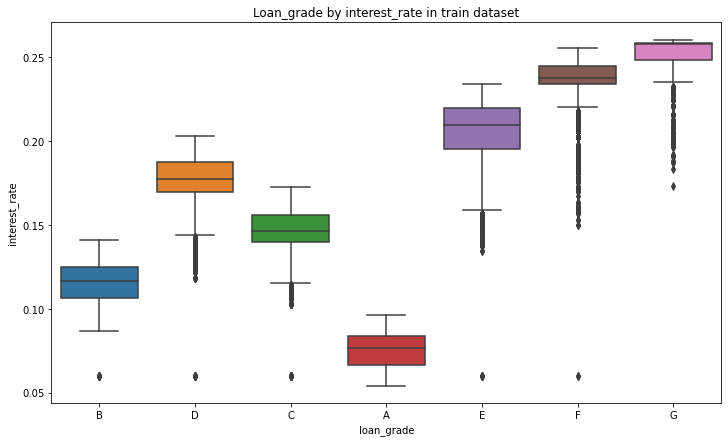

In [21]:
# Plotting loan_grade 
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_grade',y='interest_rate',data=df).set(title='Loan_grade by interest_rate in train dataset')

[Text(0.5, 1.0, 'Loan_subgrade by interest_rate in train dataset')]

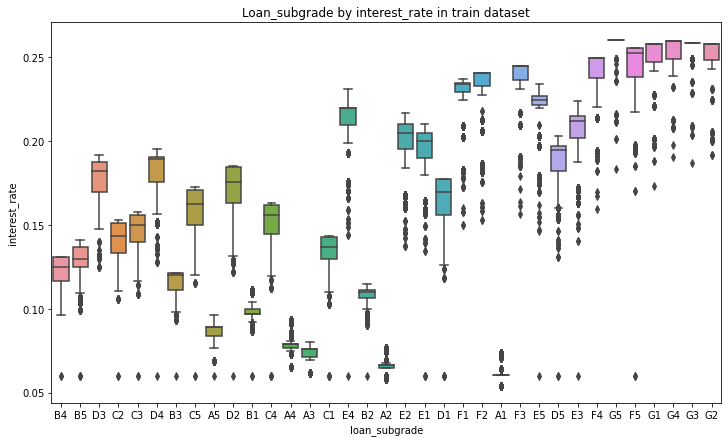

In [22]:
# Plotting loan_grade 
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_subgrade',y='interest_rate',data=df).set(title='Loan_subgrade by interest_rate in train dataset')

In [23]:
# recategorize loan grade in train 
df.loan_grade = df.loan_grade.fillna("Unknown")

# drop loan_subgrade column in train
df = df.drop("loan_subgrade", 1)

In [24]:
# drop loan_subgrade column in test
df_test = df_test.drop("loan_subgrade", 1)

In [25]:
df['loan_grade'].value_counts()

B          86121
C          76446
Unknown    51867
D          46984
A          45525
E          21628
F           8395
G           2024
Name: loan_grade, dtype: int64

g. Impute missing values in employer/job_title with "Uknown" Category

In [26]:
# train
df['employer/job_title'] = df['employer/job_title'].fillna('Unknown')

In [27]:
# test
df_test['employer/job_title'] = df_test['employer/job_title'].fillna('Unknown')

h. Convert column "years_employed" to number, and impute missing values with most common year number, which is 10. 

In [28]:
# train
df["years_employed"].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
9 years       12893
Name: years_employed, dtype: int64

In [29]:
# test
df_test["years_employed"].value_counts()

10+ years    26723
2 years       7220
< 1 year      6459
3 years       6441
1 year        5094
4 years       4603
5 years       4583
7 years       3978
8 years       3970
6 years       3385
9 years       3162
Name: years_employed, dtype: int64

In [30]:
# train
# Convert column "years_employed" to number
df["years_employed"] = df["years_employed"].str.replace('< 1 year','0')
df["years_employed"] = df["years_employed"].str.replace('1 year','1')
df["years_employed"] = df["years_employed"].str.replace('2 years','2')
df["years_employed"] = df["years_employed"].str.replace('3 years','3')
df["years_employed"] = df["years_employed"].str.replace('4 years','4')
df["years_employed"] = df["years_employed"].str.replace('5 years','5')
df["years_employed"] = df["years_employed"].str.replace('6 years','6')
df["years_employed"] = df["years_employed"].str.replace('7 years','7')
df["years_employed"] = df["years_employed"].str.replace('8 years','8')
df["years_employed"] = df["years_employed"].str.replace('9 years','9')
df["years_employed"] = df["years_employed"].str.strip('+ years')
# impute missing values
df["years_employed"] = df["years_employed"].fillna('10')
df["years_employed"].value_counts()

10    123286
2      30117
3      26670
0      26003
5      23072
1      21432
4      20259
6      19601
7      19445
8      16212
9      12893
Name: years_employed, dtype: int64

In [31]:
# test
# Convert column "years_employed" to number
df_test["years_employed"] = df_test["years_employed"].str.replace('< 1 year','0')
df_test["years_employed"] = df_test["years_employed"].str.replace('1 year','1')
df_test["years_employed"] = df_test["years_employed"].str.replace('2 years','2')
df_test["years_employed"] = df_test["years_employed"].str.replace('3 years','3')
df_test["years_employed"] = df_test["years_employed"].str.replace('4 years','4')
df_test["years_employed"] = df_test["years_employed"].str.replace('5 years','5')
df_test["years_employed"] = df_test["years_employed"].str.replace('6 years','6')
df_test["years_employed"] = df_test["years_employed"].str.replace('7 years','7')
df_test["years_employed"] = df_test["years_employed"].str.replace('8 years','8')
df_test["years_employed"] = df_test["years_employed"].str.replace('9 years','9')
df_test["years_employed"] = df_test["years_employed"].str.strip('+ years')
# impute missing values
df_test["years_employed"] = df_test["years_employed"].fillna('10')
df_test["years_employed"].value_counts()

10    31105
2      7220
0      6459
3      6441
1      5094
4      4603
5      4583
7      3978
8      3970
6      3385
9      3162
Name: years_employed, dtype: int64

i Impute missing values in column home_owenrship_status with most frequent category, which is MORTGAGE.

In [32]:
df["home_owenrship_status"].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: home_owenrship_status, dtype: int64

In [33]:
#train
df['home_owenrship_status'].fillna('MORTGAGE',inplace=True)

j. Impute missing values in revolving_line_utilization_rate, annual_income_borrower with interpolation

In [34]:
# train
df['revolving_line_utilization_rate'] = df['revolving_line_utilization_rate'].interpolate()
df['annual_income_borrower'] = df['annual_income_borrower'].interpolate()

In [35]:
# test
df_test['revolving_line_utilization_rate'] = df_test['revolving_line_utilization_rate'].interpolate()

k. drop loan_title column in both training and test datasets 

In [36]:
df["loan_title"].value_counts()

Debt consolidation               105698
Credit card refinancing           40499
Debt Consolidation                13275
Home improvement                   9888
Other                              8188
                                  ...  
wisdom                                1
excellent                             1
RELEAF                                1
Brian's Debt Consolidation            1
Fast Track Debt Consolidation         1
Name: loan_title, Length: 53617, dtype: int64

In [37]:
# train
df = df.drop("loan_title", 1)

# test
df_test = df_test.drop("loan_title", 1)

l: select missing rows and remove them from training dataset

In [38]:
# null/blank row
df[df['loan_amount_requested'].isnull()]

,interest_rate,unique_id_loan,unquie_id_borrower,loan_amount_requested,loan_amount_funded,inverstor_funded_loan,number_payments,loan_grade,employer/job_title,years_employed,...,debt_to_income,30+_pastdue_times,date_earliest_reported_credit_line,num_inqueries_creditor,num_open_credit_lines,num_derogatory_records,credit_revolving_balance,revolving_line_utilization_rate,total_credit_lines,initial_loan_status
364111,0.0769,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5725,NaN,NaN


In [39]:
# drop null'blank row
df = df.dropna()
#train
df.isnull().sum().sum()

0

In [40]:
#test
df_test.isnull().sum().sum()

0

### Feature Engineering 

#### 1. Drop columns state_borrower and date_earliest_reported_credit_line 

In [41]:
# train
df = df.drop("zip_code", 1)
df = df.drop("date_earliest_reported_credit_line", 1)

# test 
df_test = df_test.drop("zip_code", 1)
df_test = df_test.drop("date_earliest_reported_credit_line", 1)

#### 2. Only keep the month in date_loan_issued column

In [42]:
# train 
df['date_loan_issued'] = df['date_loan_issued'].str.replace('2022-','')
df['date_loan_issued'] = df['date_loan_issued'].replace(to_replace ='-.*', value = '', regex = True)

In [43]:
# test
df_test['date_loan_issued'] = df_test['date_loan_issued'].str.replace('2022-','')
df_test['date_loan_issued'] = df_test['date_loan_issued'].replace(to_replace ='-.*', value = '', regex = True)

#### 3. Convert years_employed, number_payments to integer

In [44]:
# train
df["years_employed"] = df["years_employed"].astype(int)
df["number_payments"] = df["number_payments"].astype(int)

In [45]:
# test
df_test["years_employed"] = df_test["years_employed"].astype(int)
df_test["number_payments"] = df_test["number_payments"].astype(int)

#### 4. Re-categorize employer/job_title column
There are so many categories in this column, and thus I will merge common categories and pick top 5 frequent categories only, including "Manager," "Unknown," "Teacher," "Nurse," and "Driver." For the rest categories, I will rename them as "Other."

In [46]:
# train
df['employer/job_title'].value_counts().head(20)

Unknown                     20256
Teacher                      3602
Manager                      2875
Registered Nurse             1537
RN                           1452
Supervisor                   1286
Project Manager              1095
Sales                        1048
Office Manager                912
Owner                         870
manager                       866
Driver                        842
General Manager               806
Director                      783
teacher                       761
Engineer                      704
Vice President                618
driver                        612
President                     557
Administrative Assistant      549
Name: employer/job_title, dtype: int64

In [47]:
# test
df_test['employer/job_title'].value_counts()

Unknown                     4394
Teacher                     1557
Manager                     1277
Owner                        779
RN                           595
                            ... 
Office assistan one            1
Press Utility                  1
logistics team member          1
Pharmacy Director              1
Bridge & Building Welder       1
Name: employer/job_title, Length: 31558, dtype: int64

In [48]:
# Merge all types pf managers together 
# train
df['employer/job_title'] = df['employer/job_title'].replace(to_replace ='.*Manager.*', value = 'Manager', regex = True)

# test
df_test['employer/job_title'] = df_test['employer/job_title'].replace(to_replace ='.*Manager.*', value = 'Manager', regex = True)

In [49]:
# Merge all types of presidents
#train
df['employer/job_title'] = df['employer/job_title'].replace(to_replace ='.*President.*', value = 'President', regex = True)

#test
df_test['employer/job_title'] = df_test['employer/job_title'].replace(to_replace ='.*President.*', value = 'President', regex = True)

In [50]:
# Merge all types of drivers
# train
df['employer/job_title'] = df['employer/job_title'].replace(to_replace ='.*Driver.*', value = 'Driver', regex = True)

# test
df_test['employer/job_title'] = df_test['employer/job_title'].replace(to_replace ='.*Driver.*', value = 'Driver', regex = True)

In [51]:
# Merge 'Registered Nurse' with 'RN'
#train
df['employer/job_title'] = df['employer/job_title'].str.replace('RN','Registered Nurse')

#test
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('RN','Registered Nurse')

In [52]:
# Unified format of 'Manager' 'Teacher', 'Supervisor', 'Driver' "Sales", "Owner"
# train 
df['employer/job_title'] = df['employer/job_title'].str.replace('MANAGER','Manager')
df['employer/job_title'] = df['employer/job_title'].str.replace('manager','Manager')
df['employer/job_title'] = df['employer/job_title'].str.replace('teacher','Teacher')
df['employer/job_title'] = df['employer/job_title'].str.replace('supervisor','Supervisor')
df['employer/job_title'] = df['employer/job_title'].str.replace('driver','Driver')
df['employer/job_title'] = df['employer/job_title'].str.replace('sales','Sales')
df['employer/job_title'] = df['employer/job_title'].str.replace('owner','Owner')
df['employer/job_title'] = df['employer/job_title'].str.replace('registered nurse','Registered Nurse')
df['employer/job_title'].value_counts()

Manager                                   23220
Unknown                                   20256
Teacher                                    4363
Registered Nurse                           3293
Driver                                     2460
                                          ...  
Gutman Early Learning Center                  1
Alabama Commission on Higher Education        1
warehouse worker Supervisor                   1
Technian                                      1
Senior Relationship Advisor                   1
Name: employer/job_title, Length: 156716, dtype: int64

In [53]:
# Unified format of 'Manager' 'Teacher', 'Supervisor', 'Driver' "Sales", "Owner"
# test
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('MANAGER','Manager')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('manager','Manager')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('teacher','Teacher')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('supervisor','Supervisor')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('driver','Driver')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('sales','Sales')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('owner','Owner')
df_test['employer/job_title'] = df_test['employer/job_title'].str.replace('registered nurse','Registered Nurse')
df_test['employer/job_title'].value_counts()

Manager                        9868
Unknown                        4394
Teacher                        1917
Registered Nurse               1280
Owner                          1227
                               ... 
Deputy Director, CTO              1
Customer Experience Analyst       1
Flight chief                      1
submarine electrician             1
Bridge & Building Welder          1
Name: employer/job_title, Length: 28253, dtype: int64

In [54]:
# Select Manager," "Unknown," "Teacher," "Nurse," and "Driver." and rename rest as "Other"
# train
top_5 = ['Manager', 'Unkown','Registered Nurse', 'Teacher','Assistant']
df['employer/job_title'] = df['employer/job_title'].apply(lambda i: i if i in top_5 else 'OTHER')

# test
df_test['employer/job_title'] = df_test['employer/job_title'].apply(lambda i: i if i in top_5 else 'OTHER')

#### 5. Encode categorcial variables in both train and test datasets 

In [55]:
df_test['initial_loan_status'].value_counts()

f    40440
w    39560
Name: initial_loan_status, dtype: int64

In [56]:
# loan_grade
#train 
le = preprocessing.LabelEncoder()
df['loan_grade'] = le.fit_transform(df['loan_grade'])

#test
df_test['loan_grade'] = le.fit_transform(df_test['loan_grade'])

In [57]:
# employer/job_title
#train 
df['employer/job_title'] = le.fit_transform(df['employer/job_title'])

#test
df_test['employer/job_title'] = le.fit_transform(df_test['employer/job_title'])

In [58]:
# home_owenrship_status
#train 
df['home_owenrship_status'] = le.fit_transform(df['home_owenrship_status'])

#test
df_test['home_owenrship_status'] = le.fit_transform(df_test['home_owenrship_status'])

In [59]:
# income_verification
#train 
df['income_verification'] = le.fit_transform(df['income_verification'])

#test
df_test['income_verification'] = le.fit_transform(df_test['income_verification'])

In [60]:
# date_loan_issued 
#train 
df['date_loan_issued'] = le.fit_transform(df['date_loan_issued'])

#test
df_test['date_loan_issued'] = le.fit_transform(df_test['date_loan_issued'])

In [61]:
# loan_category
#train 
df['loan_category'] = le.fit_transform(df['loan_category'])

#test
df_test['loan_category'] = le.fit_transform(df_test['loan_category'])

In [62]:
# state_borrower
#train 
df['state_borrower'] = le.fit_transform(df['state_borrower'])

#test
df_test['state_borrower'] = le.fit_transform(df_test['state_borrower'])

In [63]:
# initial_loan_status
#train 
df['initial_loan_status'] = le.fit_transform(df['initial_loan_status'])

#test
df_test['initial_loan_status'] = le.fit_transform(df_test['initial_loan_status'])

#### 6. drop unique_id_loan and unique_id_borrower as they are not relevant to the response variable 

In [64]:
# train 
loan_train = df.drop("unique_id_loan", 1)

# test
loan_test = df_test.drop("unique_id_loan", 1)

In [65]:
# train 
loan_train = df.drop("unquie_id_borrower", 1)

# test
loan_test = df_test.drop("unquie_id_borrower", 1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   interest_rate                    338989 non-null  float64
 1   unique_id_loan                   338989 non-null  float64
 2   unquie_id_borrower               338989 non-null  float64
 3   loan_amount_requested            338989 non-null  float64
 4   loan_amount_funded               338989 non-null  float64
 5   inverstor_funded_loan            338989 non-null  float64
 6   number_payments                  338989 non-null  int32  
 7   loan_grade                       338989 non-null  int32  
 8   employer/job_title               338989 non-null  int32  
 9   years_employed                   338989 non-null  int32  
 10  home_owenrship_status            338989 non-null  int32  
 11  annual_income_borrower           338989 non-null  float64
 12  in

### EDA

#### Correlation Matrix  & Plot

In [67]:
# correlation matrix for checking collinearity
corrMatrix = loan_train.corr()
corrMatrix

,interest_rate,unique_id_loan,loan_amount_requested,loan_amount_funded,inverstor_funded_loan,number_payments,loan_grade,employer/job_title,years_employed,home_owenrship_status,...,state_borrower,debt_to_income,30+_pastdue_times,num_inqueries_creditor,num_open_credit_lines,num_derogatory_records,credit_revolving_balance,revolving_line_utilization_rate,total_credit_lines,initial_loan_status
interest_rate,1.000000,0.033545,0.177732,0.177732,0.177732,0.456447,0.479367,-0.006554,0.039394,0.054400,...,0.006627,0.158111,0.091661,0.210398,0.020455,0.073577,0.008171,0.342442,-0.027147,-0.009729
unique_id_loan,0.033545,1.000000,0.074463,0.074463,0.074463,0.076678,0.046451,-0.068387,0.049436,-0.018157,...,0.021838,0.119501,0.079511,-0.015601,0.114162,0.121297,0.021698,-0.007588,0.094038,0.355093
loan_amount_requested,0.177732,0.074463,1.000000,1.000000,1.000000,0.411106,0.090218,-0.035024,0.100549,-0.177998,...,0.018458,0.061124,0.008768,-0.002119,0.204428,-0.077598,0.334003,0.118226,0.237175,0.052836
loan_amount_funded,0.177732,0.074463,1.000000,1.000000,1.000000,0.411106,0.090218,-0.035024,0.100549,-0.177998,...,0.018458,0.061124,0.008768,-0.002119,0.204428,-0.077598,0.334003,0.118226,0.237175,0.052836
inverstor_funded_loan,0.177732,0.074463,1.000000,1.000000,1.000000,0.411106,0.090218,-0.035024,0.100549,-0.177998,...,0.018458,0.061124,0.008768,-0.002119,0.204428,-0.077598,0.334003,0.118226,0.237175,0.052836
number_payments,0.456447,0.076678,0.411106,0.411106,0.411106,1.000000,0.236585,-0.021883,0.069836,-0.105403,...,0.026104,0.087499,0.005597,0.025956,0.073093,-0.019521,0.093303,0.084607,0.099041,0.037905
loan_grade,0.479367,0.046451,0.090218,0.090218,0.090218,0.236585,1.000000,-0.003525,0.015564,0.025484,...,-0.000010,0.068384,0.043199,0.102711,0.010274,0.034882,0.006670,0.155655,-0.009156,0.000137
employer/job_title,-0.006554,-0.068387,-0.035024,-0.035024,-0.035024,-0.021883,-0.003525,1.000000,0.029224,0.001610,...,0.001419,0.018225,0.009671,-0.005993,0.007105,-0.014923,-0.016864,-0.005967,0.018109,-0.029537
years_employed,0.039394,0.049436,0.100549,0.100549,0.100549,0.069836,0.015564,0.029224,1.000000,-0.173361,...,0.011303,0.056522,0.027996,-0.007199,0.031020,0.049716,0.083401,0.040552,0.106947,0.028769
home_owenrship_status,0.054400,-0.018157,-0.177998,-0.177998,-0.177998,-0.105403,0.025484,0.001610,-0.173361,1.000000,...,-0.061982,0.000824,-0.045148,-0.060478,-0.122071,0.001653,-0.140236,-0.002794,-0.205035,-0.020751


<AxesSubplot:>

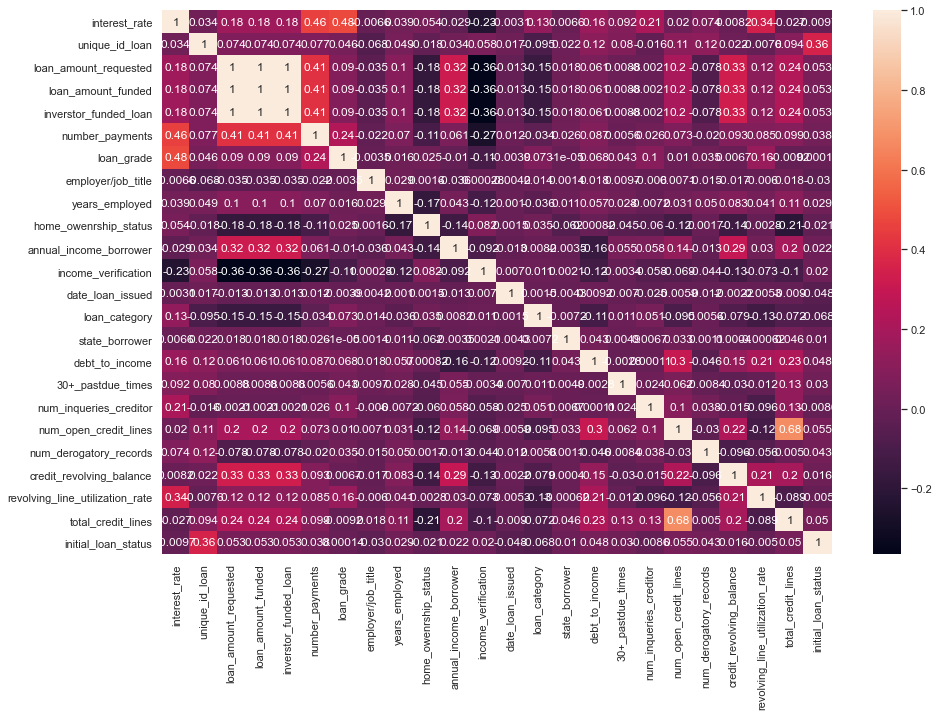

In [68]:
# heatmap displaying correlation Matrix 
sns.set(rc={'figure.figsize':(15,10)})
# show variables with correlation greater than 0.7. 
#[corrMatrix > 0.7]
sns.heatmap(corrMatrix, annot=True)

####  From correlation matrix, I find that loan_amount_requested, investor_funded_loan and loan_amount_funded have positive linear relationship with each other. Thus, to prevent issue of collinearity, I decide to drop columns investor_funded_loan and loan_amount_funded in training and testin datasets.

In [69]:
# train 
loan_train = loan_train.drop("inverstor_funded_loan", 1)

# test
loan_test = loan_test.drop("inverstor_funded_loan", 1)

In [70]:
# train 
loan_train = loan_train.drop("loan_amount_funded", 1)

# test
loan_test = loan_test.drop("loan_amount_funded", 1)

## Build Models

In [71]:
# standerdize data
scaler = StandardScaler()
loan_train_sd = scaler.fit_transform(loan_train)
loan_train_sd = pd.DataFrame(data = loan_train_sd, columns=loan_train.columns)
loan_train_sd.head()

,interest_rate,unique_id_loan,loan_amount_requested,number_payments,loan_grade,employer/job_title,years_employed,home_owenrship_status,annual_income_borrower,income_verification,...,state_borrower,debt_to_income,30+_pastdue_times,num_inqueries_creditor,num_open_credit_lines,num_derogatory_records,credit_revolving_balance,revolving_line_utilization_rate,total_credit_lines,initial_loan_status
0,-0.469694,-1.251578,1.299407,-0.606666,-0.721423,0.092744,-1.699791,1.268514,0.221398,-1.135968,...,-1.252910,0.322553,-0.351968,-0.772152,-0.228363,-0.302138,0.651635,-0.177402,1.483838,-0.676306
1,-0.739227,-1.251451,-0.881816,-0.606666,-0.721423,0.092744,-1.699791,1.268514,-0.151049,1.272126,...,0.706640,-0.351717,-0.351968,-0.772152,-0.841098,-0.302138,0.892918,0.858384,-1.567229,-0.676306
2,0.695238,-1.251271,1.299407,-0.606666,0.176570,0.092744,-1.424142,1.268514,-0.057937,-1.135968,...,0.706640,-0.844103,-0.351968,-0.772152,-0.228363,-0.302138,0.197502,0.420490,-0.695496,-0.676306
3,-0.191024,-1.251261,-1.584655,-0.606666,-0.272427,0.092744,1.056701,0.742153,-0.355895,1.272126,...,1.314776,-1.497587,-0.351968,-0.772152,-1.249589,-0.302138,-0.677473,-0.670032,0.524931,-0.676306
4,-0.085951,-1.251240,-0.421336,-0.606666,-0.272427,0.092744,-0.045896,1.268514,-0.765587,1.272126,...,-1.117768,-0.697297,-0.351968,0.171901,0.588618,-0.302138,-0.630572,-1.293188,1.309491,-0.676306


In [72]:
# Split standerdized data into two datasets, one with predictors, one with response
X, y = loan_train_sd.drop(['interest_rate'], axis = 1), loan_train_sd['interest_rate']

In [73]:
# Split non-standerdized data into two datasets, one with predictors, one with response
X_n, y_n = loan_train.drop(['interest_rate'], axis = 1), loan_train['interest_rate'] 

### Linear Regression

In [74]:
# cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model1 = LinearRegression()

#use k-fold CV to evaluate model
linear_scores = cross_val_score(model1, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [75]:
# mean RMSE
round(np.sqrt(np.mean(np.absolute(linear_scores))), 4)

0.6916

### Decision Tree

In [76]:
# build decision tree model 
model2 = DecisionTreeRegressor(random_state=0, criterion="squared_error")
model2_fit = model2.fit(X_n, y_n)

model2_scores = cross_val_score(model2_fit, X_n, y_n, scoring = "neg_mean_squared_error",cv = cv, n_jobs = -1)

In [77]:
# mean RMSE with cv
round(np.sqrt(np.mean(np.absolute(model2_scores))),4)

0.0203

### Random Forest

In [78]:
# build random forest model 
model3 = RandomForestRegressor()
random_scores = cross_val_score(model3, X_n, y_n, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

In [79]:
# mean RMSE with cv
round(np.sqrt(np.mean(np.absolute(random_scores))),4)

0.0141

### Lasso Regression

In [80]:
# build lasso regression model 
model4 = Lasso(alpha=1.0)
lasso_scores = cross_val_score(model4, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [81]:
# mean RMSE with cv
round(np.sqrt(np.mean(np.absolute(lasso_scores))),4)

1.0

### Ridge Regression

In [82]:
# build ridge regression model 
model5 = Ridge(alpha=1.0)
ridge_scores = cross_val_score(model5, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [83]:
# mean RMSE with cv
round(np.sqrt(np.mean(np.absolute(ridge_scores))),4)

0.6916

#### I run three linear models: multiple linear regression, lasso regression, and ridge regression and two nonlinear models: deicsion tree and random forest. In general, onlinear models perform better, as both decsion tree and random forest have relative lower RMSE values. Random forest performs better than decsion tree, which totally makes sense because random forest consists of many decision trees. So, I will apply random forest model to predict interest rate.

## Test Models 

In [84]:
# Apply random forest
#fit train
pred = model3.fit(X_n, y_n)

# test
pred= model3.predict(loan_test)
pred.shape

(80000,)

In [85]:
# convert to pandas data frame 
pred = pd.DataFrame(pred)
# rename column name
pred.columns = ["X1: predicted_interest_rate"]

In [86]:
pred.head()

,X1: predicted_interest_rate
0,0.138817
1,0.069602
2,0.138678
3,0.169022
4,0.110581


In [87]:
# export to csv 
pred.to_csv("Results_from_NaiboHu.csv", sep='\t', encoding='utf-8',index=False)

## Write-Up

I used multiple linear regression,lasso regression,ridge regression, decision tree, and random forests to train the model, and random forest performs the best as it has the lowest RMSE. The major benefit of Lasso and ridge regression is that they involve regularization technique to reduce the issue of overfitting and collinearity that linear regressions usually have. Also, lasso and ridge regression are more suitable for prediction than for inference. However, the drawback of ridge and lasso regression is that it becomes difficult to interpret the coefficients in the final model since they get shrunk towards zero. I use decision tree because it requires less data cleaning and can work with both numerical and categorical features. In addition,as a non-parametric model, decision tree makes no assumption about the shape of data. However, decision tree tends to have overfitting issue.  Finally, random forest has low risk of overfitting and works well on non-linear data. However, random forest is usually slow in training model and is not suitable for linear methods.